## A three-state master equation

Consider the following kinetic model:

<img src="three-state.pdf">

This model is represented by the following non-zero rates: $k_{21}$ = 100 s$^{-1}$, $k_{12}$ = 200 s$^{-1}$, $k_{32}$ = 10 s$^{-1}$, $k_{23}$ = 1 s$^{-1}$, and a resulting rate matrix of 

$$
\mathbf{K} =
 \begin{pmatrix}
  -\sum_{i \neq 1} k_{i1} & k_{12} & k_{13} \\
  k_{21} & -\sum_{i \neq 2}k_{i2} & k_{23} \\
  k_{31} & k_{32} & -\sum_{i \neq 3}k_{i3}
 \end{pmatrix} =    \begin{pmatrix}
  -100 & 200 & 0 \\
 100 & -210 & 1 \\
  0 & 10 & -1
 \end{pmatrix}
$$






In [62]:
import numpy as np
K = np.array( [[-100., 200., 0.], [100., -210., 1.], [0., 10., -1.]])

In [96]:
from scipy.linalg import eig

### Get the right eigenvectors ###
evals, evecs = eig(K)

# sort evals and evecs from |\lambda_i| smallest (0) to biggest 
I = np.argsort(np.abs(evals))
print I
evals = np.real(evals[I])
evecs = evecs[:,I]
print "evals", evals
print "evecs", evecs 

### Get the left eigenvectors ###
left_evals, left_evecs = eig(np.transpose(K))

# sort evals and evecs from |\lambda_i| smallest (0) to biggest 
I = np.argsort(np.abs(left_evals))
print I
left_evals = np.real(left_evals[I])
left_evecs = left_evecs[:,I]
print "evals", left_evals
print "left_evecs", left_evecs 


# modify the equilibrium evecs to reflect equilibirum populations
evecs[:,0] = evecs[:,0]/evecs[:,0].sum()
left_evecs[:,0] = np.ones( evecs[:,0].shape )
print 'evecs[:,0]', evecs[:,0], 'left_evecs[:,0]', left_evecs[:,0]

# flip signs of the amplitudes are negative
p0 = np.array((1.,0.,0.))
amplitudes = []
for i in range(3):
    amp = np.dot(left_evecs[:,i],p0)
    print 'amp', i, ':', amp
    if amp < 0.0:
        evecs[:,i] = - evecs[:,i]
        left_evecs[:,i] = -left_evecs[:,i]

# Normalize the non-equilibrium left eigenvectors
for i in range(1,3):
    product = np.dot(left_evecs[:,i],evecs[:,i])
    print 'product', i, ':', product
    left_evecs[:,i] = left_evecs[:,i]/product

## Check that left and right products are \delta_ij
print np.dot(left_evecs[:,0], evecs[:,0])
print np.dot(left_evecs[:,1], evecs[:,1])
print np.dot(left_evecs[:,2], evecs[:,2])

[2 1 0]
evals [  2.56640071e-15  -4.23781041e+00  -3.06762190e+02]
evecs [[ 0.19518001 -0.54104334 -0.69506345]
 [ 0.09759001 -0.25905748  0.7185642 ]
 [ 0.97590007  0.80010082 -0.02350075]]
[2 1 0]
evals [  2.62482403e-15  -4.23781041e+00  -3.06762190e+02]
left_evecs [[ 0.57735027 -0.70630999 -0.43539597]
 [ 0.57735027 -0.67637791  0.90023424]
 [ 0.57735027  0.20889979 -0.00294423]]
evecs[:,0] [ 0.15384615  0.07692308  0.76923077] left_evecs[:,0] [ 1.  1.  1.]
amp 0 : 1.0
amp 1 : -0.706309988812
amp 2 : -0.435395968304
product 1 : 0.724505965651
product 2 : 0.949573113641
1.0
1.0
1.0


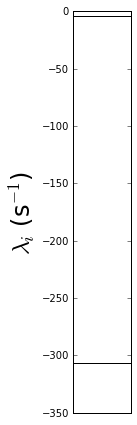

In [106]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(2,6))
for i in range(1,3):
    plt.plot([0,1],[evals[i],evals[i]],'k-')
plt.xticks([])
plt.ylabel('$\lambda_i$ (s$^{-1}$)', fontsize=24)
plt.tight_layout()
plt.savefig('spectrum.pdf')

pos_evec [ 0.15384615  0.07692308  0.76923077]
neg_evec [ 0.  0.  0.]
1.0
pos_evec [ 0.54104334  0.25905748  0.        ]
neg_evec [ 0.          0.         -0.80010082]
0.974884986871
pos_evec [ 0.69506345  0.          0.02350075]
neg_evec [ 0.        -0.7185642  0.       ]
0.458517582322


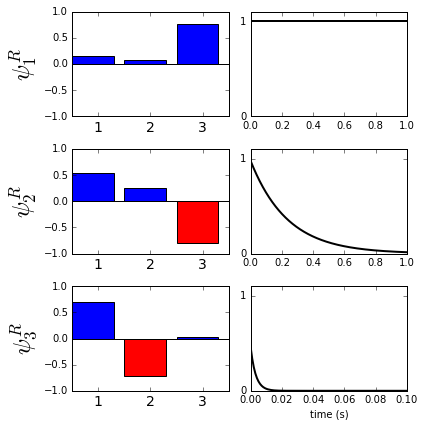

In [122]:
plt.figure(figsize=(6,6))
for i in range(3):
    
    # plot eigenmodes 
    plt.subplot(3,2,2*i+1)
    pos_evec = np.maximum(evecs[:,i], np.zeros(evecs[:,i].shape))
    print 'pos_evec', pos_evec
    if sum(pos_evec) > 0: 
        plt.bar([1,2,3], pos_evec, color='b')
    neg_evec = np.minimum(evecs[:,i], np.zeros(evecs[:,i].shape))
    print 'neg_evec', neg_evec
    if sum(neg_evec) < 0: 
        plt.bar([1,2,3], neg_evec, color='r')
    #plt.xticklabels([1,2,3])
    plt.plot([1.0,4.0],[0,0],'k-')
    plt.xticks([1.5, 2.5, 3.5], ["1", "2", "3"], fontsize=14)
    plt.ylim(-1,1)
    plt.ylabel('$\\psi_%d^R$'%(i+1), fontsize=24)
    
    # plot relaxation with amplitude
    plt.subplot(3,2,2*i+2)
    
    amp = np.dot(left_evecs[:,i],p0)
    print amp
    t = np.arange(0,1.,0.001)  # in seconds
    y = amp*np.exp(evals[i]*t)
    plt.plot(t,y,'k-', linewidth=2)
    
    if i == 2:
        plt.xlabel('time (s)')
        plt.xlim(0,0.1)
    else:
        plt.xlim(0,1)
    plt.ylim(0,1.1)
    plt.yticks([0,1])

plt.tight_layout()
#plt.ylabel('$\lambda_i$ (s$^{-1}$)')
plt.savefig('evecs.pdf')

In [66]:
f = np.array([1,2,3,4])
np.minimum(f, np.zeros(f.shape))

array([ 0.,  0.,  0.,  0.])

In [73]:
# Left evecs

from scipy.linalg import eig


[2 1 0]
evals [  2.62482403e-15  -4.23781041e+00  -3.06762190e+02]
left_evecs [[ 0.57735027 -0.70630999 -0.43539597]
 [ 0.57735027 -0.67637791  0.90023424]
 [ 0.57735027  0.20889979 -0.00294423]]


0.581543139237
1.54142032252
0.902322892092


In [70]:
0.57735027*0.57735027

0.33333333426907297